# Face Detection

Face detection is one of the hot button issues facing the public domain today as many firms and police agencies seek to implement this transformational technology. This notebook will serve as an introduction into the world of facial recognition and some of the choices that must be made when employing a model.

Topics:
<ul>
    <li>Haar Cascade</li>
    <li>CNN</li>
</ul>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Face-Detection" data-toc-modified-id="Face-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Face Detection</a></span></li><li><span><a href="#HaaR-Cascade" data-toc-modified-id="HaaR-Cascade-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>HaaR Cascade</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Real-Time-Face-Detection" data-toc-modified-id="Real-Time-Face-Detection-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Real Time Face Detection</a></span></li></ul></li></ul></li><li><span><a href="#CNNs" data-toc-modified-id="CNNs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CNNs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Real-Time-Face-Detection" data-toc-modified-id="Real-Time-Face-Detection-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Real Time Face Detection</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [13]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import dlib

# HaaR Cascade

Cascade classifiers are a popular tool that utilises a similar training algorithm to neural nets, showing the model some images with the target object and some without. The Viola-Jones detection framework is then employed.
https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

The HaaR cascade works by identifying features common to human faces such as a bright nose bridge region compared to the eyes etc. For a more detailed description, see below:
http://www.willberger.org/cascade-haar-explained/

OpenCV has a well trained cascade model which we will use.

You will need to update these paths for your Python installation

In [14]:
cascPath = "C:\\Users\\travi\\anaconda3\\pkgs\\libopencv-4.4.0-py37_2\\Library\etc\\haarcascades\\haarcascade_frontalface_default.xml"
eyePath = "C:\\Users\\travi\\anaconda3\\pkgs\\libopencv-4.4.0-py37_2\\Library\etc\\haarcascades\\haarcascade_eye.xml"
smilePath = "C:\\Users\\travi\\anaconda3\\pkgs\\libopencv-4.4.0-py37_2\\Library\etc\\haarcascades\\haarcascade_smile.xml"

faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)

We will use this random image of white guys for this tutorial, but any image of a human face should function well.
https://i.pinimg.com/originals/a2/48/73/a24873fb168ee5b4694b09e435451828.jpg

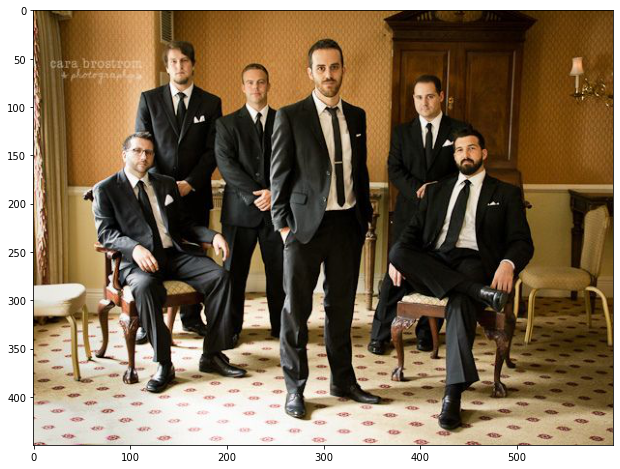

In [16]:
# Load the image
pic = mpimg.imread('faceDetect.png', 0)
plt.figure(figsize=(12,8))
plt.imshow(pic, cmap='gray')
plt.show()

The "DetectMultiScale" function has the following parameters:
<ul>
    <li>scaleFactor : Parameter specifying how much the image size is reduced at each image scale.</li>
    <li>minNeighbors : Parameter specifying how many neighbors each candidate rectangle should have to retain it.</li>
    <li>minSize : Minimum possible object size. Objects smaller than that are ignored.</li>
    <li>maxSize : Maximum possible object size. Objects larger than that are ignored.</li>
</ul>
  



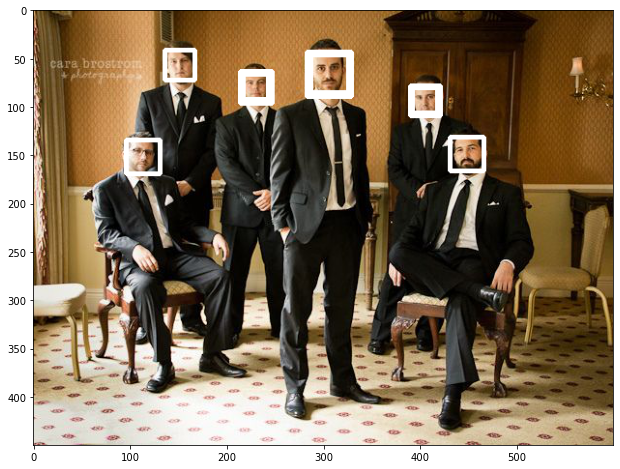

In [19]:
# Model instantiation
faces = faceCascade.detectMultiScale(
    pic,
    scaleFactor=1.1,
    minNeighbors=5,
    flags=cv2.CASCADE_SCALE_IMAGE
    )
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(pic, (x, y), (x+w, y+h), (255, 255, 255), 3)
    
plt.figure(figsize=(12,8))
plt.imshow(pic, cmap='gray')
plt.show()

### Real Time Face Detection

Now, leveraging your webcam we will perform the much harder task of live facial recignition.

Press Q to exit the video

In [20]:
font = cv2.FONT_HERSHEY_SIMPLEX # Choosing the font for the labels on the camera feed
video_capture = cv2.VideoCapture(0) # initializes the video capture

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # This line transforms the frames to Grayscale, a built in functionality of OpenCV
    pic = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Call the face cascade pre-trained model
    faces = faceCascade.detectMultiScale(
        pic,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    roi_gray=None
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    # Call the pre-trained smile detection model
    smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
        cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)

    # Call the pre-trained eye detection model
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

As you can see, the model is fairly effective at recognising faces, but struggles with eyes and smiles if you change your facial expression.

# CNNs

The model and weights can be found here:
https://github.com/davisking/dlib-models/blob/master/mmod_human_face_detector.dat.bz2

The file will need ot be unzipped before it can be used.

Convolutional Neural Networks are very popular for image processing, below is an article on the basic theory of CNN's:
https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

For this we will be using Dlib's face detection model and following largely the same procedure as for the HaaR classification. The downside of this specific model is that it will only recognise one face since CNN's are more computationally intensive, however this is all my computer could handle without crashing.

In [22]:
dnnFaceDetector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
gray = mpimg.imread('faceDetect.png', 0)

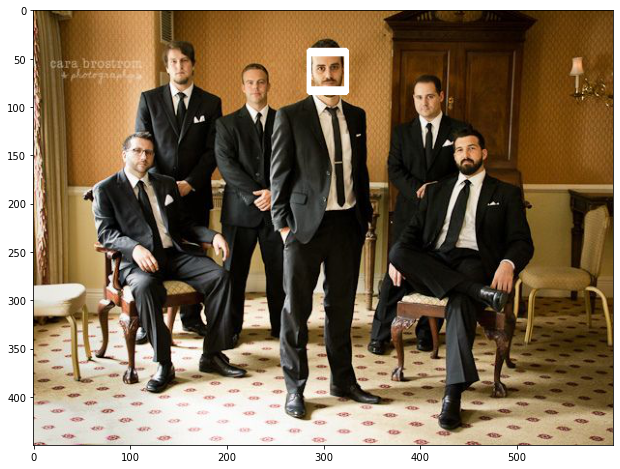

In [24]:
rects = dnnFaceDetector(gray, 1)
for (i, rect) in enumerate(rects):
    x1 = rect.rect.left()
    y1 = rect.rect.top()
    x2 = rect.rect.right()
    y2 = rect.rect.bottom()
    # Rectangle around the face
    cv2.rectangle(gray, (x1, y1), (x2, y2), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

### Real Time Face Detection

In [25]:
video_capture = cv2.VideoCapture(0)
flag = 0

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = dnnFaceDetector(gray, 1)

    for (i, rect) in enumerate(rects):

        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()

        # Rectangle around the face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the video output
    cv2.imshow('Video', frame)

    # Quit video by typing Q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

# Conclusion

Clearly the Haar Cascade is much less computationally expensive, however this comes at the cost of the accuracy of the CNN. The choice between these two models largely comes down to the speed/accuracy trade-off. There are many other models the have a different speed/accuracy ratio and can be useful depening on the context of deployment.